In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
import torch

In [56]:
import torchvision
import torchvision.transforms as transforms

In [57]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [58]:
batch_size = 6
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

Files already downloaded and verified


In [59]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

In [60]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified


In [66]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

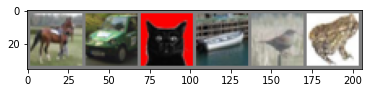

horse car   cat   ship  bird  frog 


In [67]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [68]:
trainloader

In [69]:
im, la =  dataiter.next()

In [70]:
im.size()

torch.Size([6, 3, 32, 32])

In [71]:
la

tensor([2, 6, 4, 2, 3, 5])

In [72]:
im = im/2 + 0.5  #0.25 for some clipping
im = torchvision.utils.make_grid(im)

bird  frog  deer  bird  cat   dog  


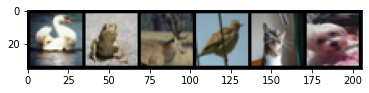

In [73]:
npim = im.numpy()
plt.imshow(np.transpose(npim, (1, 2, 0)))
print(' '.join(f'{classes[la[j]]:5s}' for j in range(batch_size)))

In [17]:
from torchvision.transforms import ToTensor

In [18]:
trainSetMnist = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [19]:
trainloaderMnist = torch.utils.data.DataLoader(trainSetMnist, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

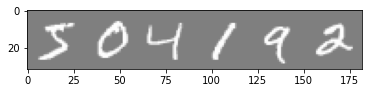

5        0        4        1        9        2       


In [20]:
# get some random training images
dataiterM = iter(trainloaderMnist)
imagesM, labelsM = dataiterM.next()

# show images
imshow(torchvision.utils.make_grid(imagesM))
# print labels
print(' '.join(f'{classes[labelsM[j]]:8s}' for j in range(batch_size)))

In [21]:
imagesM.size()

torch.Size([6, 1, 28, 28])

In [22]:
example1 = imagesM[0][0]

In [23]:
example1.size()

torch.Size([28, 28])

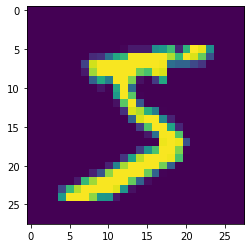

In [24]:
plt.imshow(example1)

In [25]:
ex1list = example1.tolist()

(-0.5, 27.5, 27.5, -0.5)

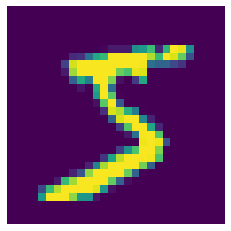

In [40]:
plt.imshow(ex1list)
plt.axis('off')

In [53]:
# 5000 MNIST pictures of size 28 x 28 take 4 MB of space. CIFAR10 15MB. SVHN also.
#Lets look at the SVH database
trainSetSVHN = torchvision.datasets.SVHN(root='./data', download=True, transform=ToTensor())

Using downloaded and verified file: ./data/train_32x32.mat


In [31]:
from torch.utils.data import random_split
val_size = 12000
train_size = len(trainSetSVHN) - val_size

train_ds, val_ds = random_split(trainSetSVHN, [train_size, val_size])
len(train_ds), len(val_ds)

(61257, 12000)

In [43]:
trainLoaderSvhn = torch.utils.data.DataLoader(train_ds, batch_size = 12, shuffle=True, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([12, 3, 32, 32])


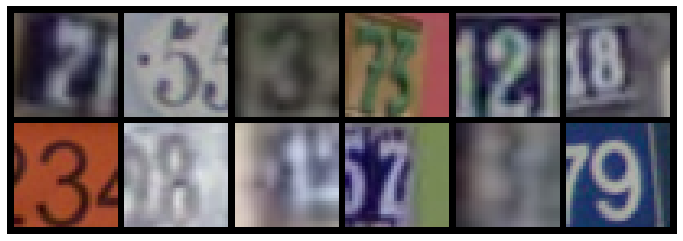

In [51]:
for ima, _ in trainLoaderSvhn:
    print('images.shape:', ima.shape)
    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.imshow(torchvision.utils.make_grid(ima, nrow=6).permute((1, 2, 0)))
    break

In [64]:
#Lets look at the ImageNet database
#trainSetImageNet = torchvision.datasets.ImageNet(root='./data', download=True, transform=ToTensor())
import skimage as si

In [96]:
#Lets create some Gaussian noise

def std2var(std):
    norm_std = std/255.0
    var = norm_std**2
    return var

def add_noise(data):
    for i in range(0, data.shape[0]): # for every image
        for j in range(0, data.shape[1]): # for every channel
            channel = np.double(data[i,j])/255.0
            channel = si.util.random_noise(channel,  mode='gaussian', var = std2var(10))
            data[i,j] = np.uint8(channel*255.0)
    return data

In [97]:
imagesnp = images.numpy()
print(imagesnp.shape)
dataNoisy = add_noise(imagesnp)
dataNoisy = torch.from_numpy(dataNoisy)

(6, 3, 32, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


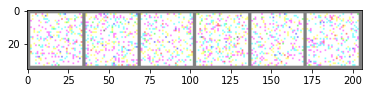

In [99]:
# show images
imshow(torchvision.utils.make_grid(dataNoisy))
# print labels
#print(' '.join(f'{classes[labels[j]]:6s}' for j in range(batch_size)))